# Kaggle competition: doc2vec approach

First of all:
 - have a broad perspective of what doc2vec does: http://arxiv.org/pdf/1405.4053v2.pdf
 - import required libraries.
 - import the training dataset.
 - define the *read_corpus* function that is required to run doc2vec algorithm.

In [1]:
import pandas as pd
import numpy as np
import gensim
import os

train_data = pd.read_csv("train.csv")

def read_corpus(input_data, tokens_only=False):
    for i, comment in enumerate(input_data):
        if tokens_only:
            yield gensim.utils.simple_preprocess(comment)
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(comment), [i])
            

C:\Users\geodna\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
train_corpus = list(read_corpus(train_data.comment_text))

These are the first 2 tokenised sentences in our corpus (wikipedia comments):

In [107]:
print(train_corpus[:2])

[TaggedDocument(words=['nonsense', 'kiss', 'off', 'geek', 'what', 'said', 'is', 'true', 'll', 'have', 'your', 'account', 'terminated'], tags=[0]), TaggedDocument(words=['please', 'do', 'not', 'vandalize', 'pages', 'as', 'you', 'did', 'with', 'this', 'edit', 'to', 'merwin', 'if', 'you', 'continue', 'to', 'do', 'so', 'you', 'will', 'be', 'blocked', 'from', 'editing'], tags=[1])]


Define the doc2vec model:
 - The __size__ of the vectors will be randomly defined as 100. We will end up with 1 vector of 100 dimensions per comment.
 
 
 - The __min count__ refers to the N contiguous words to the main word. The algorithm goes word by word looking at the context of the sentence. Example: in the sentence 'Aniuska cannot stop dancing in the office', if the algorithm is working with 'dancing', a min window size will look at 'cannot stop' and 'in the'.
 
 
 - The number of __iterations__ is the number of epochs the algorithm runs: more epochs, more precission but also overfitting.
 
We also have to build the vocabulary of the model first.

In [27]:
model = gensim.models.doc2vec.Doc2Vec(size=100, min_count=2, iter=55)
model.build_vocab(train_corpus)
%time model.train(train_corpus, total_examples=model.corpus_count, epochs=model.iter)

Wall time: 5min 46s


263561229

In [28]:
model.save('./toxic1.d2v')
#model = Doc2Vec.load('./toxic1.d2v')

The model object has an argument where it retrieves the first 10 most similar words for a given word.

In [29]:
model.wv.most_similar('fuck')

[('hell', 0.6643626689910889),
 ('piss', 0.5942816734313965),
 ('fucking', 0.5872614979743958),
 ('shit', 0.5806258916854858),
 ('damn', 0.5218321084976196),
 ('loser', 0.4987363815307617),
 ('ass', 0.4922405183315277),
 ('suck', 0.4884474575519562),
 ('guys', 0.47985368967056274),
 ('boy', 0.4767151176929474)]

We have to get the vectors for each comment

In [30]:
comment_vectors = np.array(model.docvecs)

What are the dimmensions of the array?

In [31]:
comment_vectors.shape

(95851, 100)

We want to know if there are natural clusters in the data for each one of the classes. TSNE is an algorithm to reduce the dimensionality. We will reduce it to 2 dimensions and we will plot the results with colours for each class.

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

Fit the TSNE model

In [33]:
%time comments_vectors_2d = tsne.fit_transform(comment_vectors)

Wall time: 1h 59min 19s


Has it reduced the dimensionality to 2?

In [36]:
comments_vectors_2d.shape

(95851, 2)

In order to plot the vectors, it is easier to transpose the array so we do not have to create a loop and iterate though all comments.

In [108]:
vector_coordinates = np.transpose(comments_vectors_2d)
print(a.shape)

(2, 95851)


Define the classes to plot and index the comments:

In [103]:
select1 = train_data['insult'].values.astype(bool)
select2 = train_data['identity_hate'].values.astype(bool)
select3 = train_data['threat'].values.astype(bool)

This is the plot without distinction for the classes:

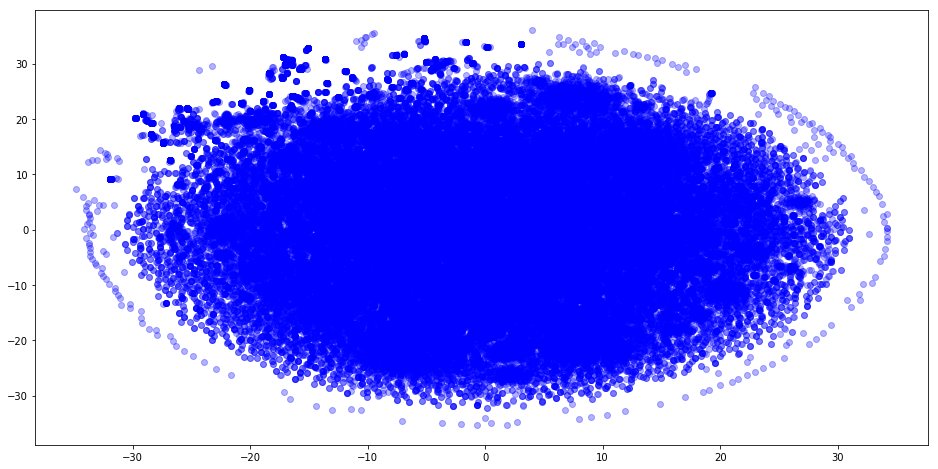

In [105]:
plt.figure(figsize = (16,8))
plt.scatter(a[0], a[1], color = 'b', alpha = 0.3)
plt.show()

Plot the vectors for the different classes into a 2D plot:

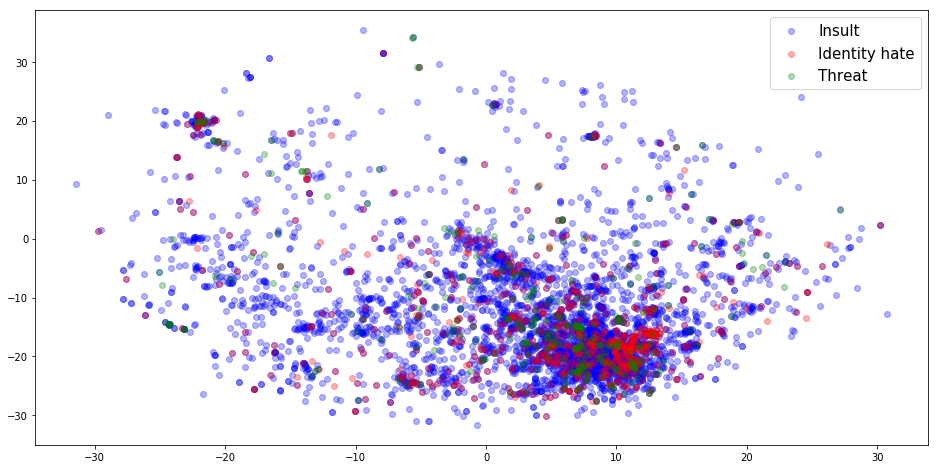

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,8))
plt.scatter(a[0][select1], a[1][select1], color = 'b', label = 'Insult', alpha = 0.3)
plt.scatter(a[0][select2], a[1][select2], color = 'r', label = 'Identity hate', alpha = 0.3)
plt.scatter(a[0][select3], a[1][select3], color = 'g', label = 'Threat', alpha = 0.3)
plt.legend(fontsize = 15)
plt.show()